In [18]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

## Years to Load

In [36]:
years = [13,14,15, 16]

In [37]:
taxi_df = {}

for i in years:
    taxi_df[i] = pd.read_csv("../dataset_4_02_modified/20" + str(i) \
                            + "lag.csv", sep = ",")
# "2016" and before
# taxi_df[15] = pd.concat([taxi_df[15], taxi_df[16]], axis = 0)\
#               .reset_index().drop(columns = ['index'])

In [38]:
y_df = {}
X_raw_df = {}
for i in years:
    y_df[i] =  pd.DataFrame(taxi_df[i]['Count'])
    X_raw_df[i] = taxi_df[i].drop(columns = ['Pickup Community Area', \
                                             'Count', 'Trip Start Timestamp'])

In [39]:
weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])

encoded_df = {}
for i in years:
    enc.fit(X_raw_df[i].weekday.values.reshape(-1, 1))
    encoded_df[i] = pd.DataFrame(enc.transform(X_raw_df[i].weekday.values.reshape(-1, 1))\
                                 .toarray().astype(int))\
                                .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

In [40]:
X_encode_df = {}
for i in years:
    X_encode_df[i] = pd.concat([X_raw_df[i].drop(columns=['weekday']), encoded_df[i]], axis=1) 

In [41]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

# Cross Validation

In [65]:
k_vec = [0, 0.001, 0.01, 0.1, 1]
train_year_vec = [13, 14, 15]
num_k = len(k_vec)
num_year = len(train_year_vec)
score_result_mat = np.zeros([num_k,num_year])
test_error_mat = np.zeros([num_k,num_year])
param_mat = np.zeros([num_k,num_year,len(X_encode_df[16].columns.values)])

for k_iter in range(0,num_k):
    for i_iter in range(0,num_year):
        k = k_vec[k_iter]
        i = train_year_vec[i_iter]
        
        reg = linear_model.Lasso(alpha=k).fit(X_mat[i], y_mat[i])
        score_result_mat[k_iter, i_iter] = reg.score(X_mat[i+1], y_mat[i+1])
        param_mat[k_iter, i_iter] = reg.coef_
        
        reg_pred = reg.predict(X_mat[i+1])
        test_error_mat[k_iter, i_iter] = mean_squared_error(y_true = y_mat[i+1], y_pred = reg_pred)        

/Users/qiaochug/Documents/CurrentCourses/CIS520/Project/chicagotaxi/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/qiaochug/Documents/CurrentCourses/CIS520/Project/chicagotaxi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


KeyboardInterrupt: 

In [62]:
test_error_mat

array([[711.36656398, 601.74575871, 397.44055784],
       [711.41402717, 601.70236153, 397.35943061],
       [712.40726696, 602.01892412, 397.39278509],
       [717.907509  , 606.13016934, 399.94564098]])

In [63]:
score_result_mat

array([[0.97466425, 0.97360093, 0.97167469],
       [0.97466256, 0.97360283, 0.97168047],
       [0.97462719, 0.97358894, 0.9716781 ],
       [0.9744313 , 0.97340858, 0.97149616]])

In [64]:
param_mat

array([[[ 0.37932226,  0.1657893 ,  0.12502806,  1.640346  ,
          0.90803046, -1.80436862,  0.49579814,  0.74767697,
          0.16610549,  0.00948971, -0.06866296,  1.61460415,
         -0.77851625,  0.13056322, -0.26123467, -0.05419175,
          0.        ,  0.24095701,  0.77776847,  0.48134169,
         -0.96389792,  0.24029411,  3.16981726, -3.65515598],
        [ 0.10160228,  0.09461537,  0.15235216,  1.73848502,
          1.11454385, -2.17617959,  0.54329504,  0.93323264,
          0.17938221,  0.00475688, -0.0921648 ,  1.64613586,
         -0.82762938,  0.14974624, -0.35772014, -0.04332942,
          0.        ,  0.21333768,  0.84359387,  0.39067447,
         -1.1511576 ,  0.25730406,  3.68860001, -4.17671863],
        [-0.13000906,  0.15145637,  0.11926214,  1.23859575,
          1.01412043, -2.13802958,  0.42852901,  0.99528793,
          0.0939045 , -0.05104826, -0.14449879,  1.61970567,
         -0.7912399 ,  0.13969561, -0.30258742, -0.04313313,
         -0.        , 

In [35]:
for i in range(0, len(reg.coef_)):
    print("{2} {0} {1} {3}".format(X_encode_df[16].columns.values[i], round(reg.coef_[i], 2),i+1, round(reg.coef_[i], 2) != 0))

1 dayofyear -0.06 True
2 dayofyear_sin 0.1 True
3 dayofyear_cos 0.0 False
4 hour 1.14 True
5 hour_sin 0.95 True
6 hour_cos -2.12 True
7 lat 1.21 True
8 lon -1.24 True
9 temperature 0.0 False
10 wind_speed -0.03 True
11 humidity -0.12 True
12 lag1 1.62 True
13 lag2 -0.79 True
14 lag3 0.14 True
15 Monday -0.23 True
16 Tuesday -0.0 False
17 Wedneseday -0.0 False
18 Thursday 0.0 False
19 Friday 0.43 True
20 Saturday 0.1 True
21 Sunday -0.92 True


398.20181164189665

# Add 2dg terms for lon and lat

In [59]:
for i in years:
    X_encode_df[i]['lat_sq'] = round(X_encode_df[i].lat.pow(2),4)
    X_encode_df[i]['lon_sq'] = round(X_encode_df[i].lon.pow(2),4)
    X_encode_df[i]['latXlon'] = round(X_encode_df[i].lat*X_encode_df[i].lon, 4)

In [60]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [87]:
reg2 = LinearRegression().fit(X_mat[15], y_mat[15])

## R^2

In [88]:
reg2.score(X_mat[16], y_mat[16])

0.9716738330784118

In [91]:
for i in range(0, len(reg2.coef_[0])):
    print("{2} {0} {1}".format(X_encode_df[16].columns.values[i], round(reg2.coef_[0][i], 2),i+1))

1 dayofyear -0.14
2 dayofyear_sin 0.16
3 dayofyear_cos 0.14
4 hour 1.25
5 hour_sin 1.03
6 hour_cos -2.14
7 lat 0.42
8 lon 1.01
9 temperature 0.11
10 wind_speed -0.05
11 humidity -0.15
12 lag1 1.62
13 lag2 -0.79
14 lag3 0.14
15 Monday -0.23
16 Tuesday 0.03
17 Wedneseday 0.08
18 Thursday 0.15
19 Friday 0.6
20 Saturday 0.27
21 Sunday -0.91
22 lat_sq 0.22
23 lon_sq 3.49
24 latXlon -3.8


## Mean Square Error

In [52]:
reg2_pred16 = reg2.predict(X_mat[16])
mean_squared_error(y_true = y_mat[16], y_pred = reg2_pred16)

397.4526127896189

## Analyze error distribution

(array([6.00000e+00, 3.70000e+01, 2.82000e+02, 1.55500e+03, 3.76326e+05,
        1.14000e+04, 1.39600e+03, 2.80000e+02, 2.70000e+01, 5.00000e+00]),
 array([-382.61772539, -303.81389611, -225.01006684, -146.20623756,
         -67.40240828,   11.40142099,   90.20525027,  169.00907954,
         247.81290882,  326.61673809,  405.42056737]),
 <a list of 10 Patch objects>)

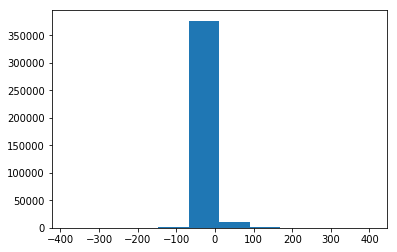

In [34]:
plt.hist(x = (y_mat[17] - reg2_pred16).reshape(1,-1)[0])

## Results (ARIMA)
### Original terms: 
#### Train 2015, Test 2016: Test R^2 0.97, Test MSE 398
### Lon Lat Sq terms: 
#### Train 2015, Test 2016: Test R^2 0.97, Test MSE 397

# 1dg Results

In [56]:
# k_vec = [0.001, 0.01, 0.1, 1]
# train_year_vec = [13, 14, 15]
test_error_mat

array([[713.10205719, 603.25319267, 398.26168699],
       [713.12840409, 603.20842295, 398.20181164],
       [713.81461665, 603.33902428, 398.20848347],
       [717.90750322, 606.13017166, 399.94564135]])

In [57]:
score_result_mat

array([[0.97460244, 0.9735348 , 0.97161617],
       [0.97460151, 0.97353676, 0.97162044],
       [0.97457707, 0.97353103, 0.97161996],
       [0.9744313 , 0.97340858, 0.97149616]])

In [58]:
param_mat

array([[[ 0.36148101,  0.16380299,  0.12975003,  1.63814087,
          0.9388111 , -1.82053919,  1.32835996, -1.45622837,
          0.16654598,  0.00864984, -0.06919413,  1.61744077,
         -0.78168598,  0.13340298, -0.2550974 , -0.05073513,
          0.        ,  0.23450092,  0.75867669,  0.45700947,
         -0.97681921],
        [ 0.09703123,  0.09187589,  0.16545516,  1.73559423,
          1.15345119, -2.19336325,  1.4722177 , -1.58757843,
          0.18455331,  0.00453062, -0.0930639 ,  1.64905639,
         -0.83099261,  0.15266465, -0.34947056, -0.038527  ,
          0.        ,  0.20783236,  0.8245904 ,  0.36634748,
         -1.16152592],
        [-0.12644166,  0.14955   ,  0.12955853,  1.23463204,
          1.05253409, -2.15022096,  1.23673235, -1.2869302 ,
          0.09990805, -0.05108355, -0.14403693,  1.62261095,
         -0.79448115,  0.14259147, -0.29420486, -0.03936098,
         -0.        ,  0.06234464,  0.50384552,  0.17361973,
         -0.97996469]],

       [[ 0.21